## Machine Learning Project on UCI Parkinsons Telemonitoring Data Set

In [1]:
import seaborn as sns # https://seaborn.pydata.org/
import matplotlib.pyplot as plt
import numpy as np
from numpy import random

In [2]:
#Cargamos la bd que está en un archivo .data y ahora la podemos manejar de forma matricial
db = np.loadtxt('DB/parkinsons_updrs.data', delimiter=',', skiprows=1)  # Assuming ',' delimiter

#X: Toma todas las filas (muestras) y las columnas 6-21 (características)
X = db[:,6:22]
#Y: Toma todas las filas y la columna 4, corresponde a la salida de la regresión
Y = db[:,4]
#G: Toma todas las filas y la columna 0, corresponde a la asociación en grupos del dataset
G = db[:,0]

In [3]:
print(X.shape)
print(Y.shape)
print(G.shape)

(5875, 16)
(5875,)
(5875,)


#### Análisis individual de características

In [4]:
# Coeficiente de correlación de Pearson
def Pearson(X,Y):
    pearson_coef = np.corrcoef(X,Y,rowvar=False)
    #print(pearson_coef)
    
    plt.subplots(figsize=(7,6))
    ax1 = sns.heatmap(pearson_coef,cmap=plt.cm.jet,annot=False)   

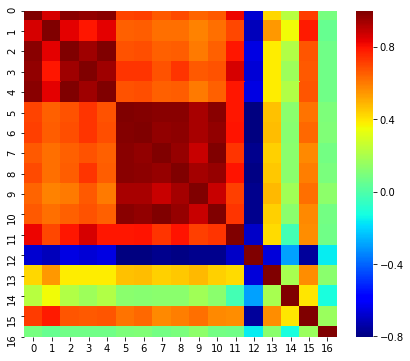

In [5]:
Pearson(X,Y)

#### Selección de Características

In [6]:
#!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

import pandas as pd

In [16]:
#Feature Selection Function - SFS
def selectFeatures(model):
    
    random.seed(19680801)
    iterations = 10
    gss = GroupShuffleSplit(n_splits=iterations, train_size=0.7)
    index = gss.split(X, Y, G)
    cv = list(index) 
    
    mae = make_scorer(mean_absolute_error)
    
    # Sequential Forward Selection
    sfs = SFS(model, 
           k_features = 2, 
           forward = True,
           floating = False,
           verbose = 10,
           scoring = mae,
           cv = cv)
    
    pipe = make_pipeline(StandardScaler(), sfs)
    
    pipe.fit(X, Y)
    
    return sfs.get_metric_dict()

In [8]:
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.svm import SVR

# models
mlpr = MLPRegressor(hidden_layer_sizes=(40,40,40), activation='tanh', max_iter=1500, alpha=100)
svr = SVR(kernel='linear', C=1e-3)
pw = RadiusNeighborsRegressor(weights='distance', radius=15, p=2)

Wrapper: ANN

In [ ]:
outcomesMLPR = selectFeatures(mlpr)
plot_sfs(outcomesMLPR, kind='std_dev')
pd.DataFrame.from_dict(outcomesMLPR).T[['feature_idx', 'avg_score', 'std_dev']]

Wrapper: Parzen Window

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   17.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   21.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   24.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   28.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   31.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   34.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   58.0s finished

[2020-06-06 20:22:14] Features: 1/16 -- score: 8.136605168317473[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 con

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   30.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   38.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   44.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   48.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   48.8s finished

[2020-06-06 20:30:29] Features: 10/16 -- score: 7.011807690096641[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.1s re

,feature_idx,avg_score,std_dev
1,"(7,)",8.13661,0.4516
2,"(7, 10)",7.91573,0.45341
3,"(7, 8, 10)",7.03485,0.574067
4,"(4, 7, 8, 10)",7.01712,0.601296
5,"(2, 4, 7, 8, 10)",7.02057,0.605058
6,"(2, 3, 4, 7, 8, 10)",7.02075,0.60792
7,"(1, 2, 3, 4, 7, 8, 10)",7.01976,0.603792
8,"(0, 1, 2, 3, 4, 7, 8, 10)",7.0196,0.606976
9,"(0, 1, 2, 3, 4, 7, 8, 10, 11)",7.01556,0.6075
10,"(0, 1, 2, 3, 4, 5, 7, 8, 10, 11)",7.01181,0.60593


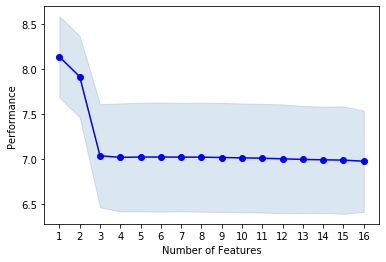

In [11]:
outcomesPW = selectFeatures(pw)
plot_sfs(outcomesPW, kind='std_dev')
pd.DataFrame.from_dict(outcomesPW).T[['feature_idx', 'avg_score', 'std_dev']]

Wrapper: SVR

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   14.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   18.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   21.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   25.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   29.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   32.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   58.2s finished

[2020-06-06 20:40:08] Features: 1/16 -- score: 7.184896392010222[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 con

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   20.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   25.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   30.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   35.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   35.0s finished

[2020-06-06 20:47:31] Features: 10/16 -- score: 7.1922399756487065[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.2s r

,feature_idx,avg_score,std_dev
1,"(14,)",7.1849,0.674606
2,"(1, 14)",7.19409,0.69049
3,"(1, 4, 14)",7.19455,0.695393
4,"(1, 2, 4, 14)",7.19617,0.699874
5,"(1, 2, 3, 4, 14)",7.19794,0.705911
6,"(1, 2, 3, 4, 11, 14)",7.19745,0.703584
7,"(1, 2, 3, 4, 10, 11, 14)",7.19678,0.698643
8,"(1, 2, 3, 4, 7, 10, 11, 14)",7.19728,0.696788
9,"(0, 1, 2, 3, 4, 7, 10, 11, 14)",7.1967,0.698433
10,"(0, 1, 2, 3, 4, 7, 8, 10, 11, 14)",7.19224,0.694135


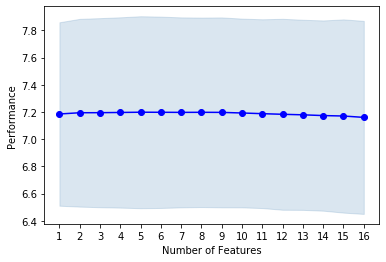

In [13]:
outcomesSVR = selectFeatures(svr)
plot_sfs(outcomesSVR, kind='std_dev')
pd.DataFrame.from_dict(outcomesSVR).T[['feature_idx', 'avg_score', 'std_dev']]